In [1]:
import matplotlib
import matplotlib.pyplot as plt
import torch
from matplotlib.image import imread

from csmc import CSMC, SoftImpute
from csmc.css  import uniform
from csmc.errors.errors import approx_err
from csmc.transform import dls
from tests.data_generation import remove_pixels_uniformly

M with dimensions (1750, 3500)


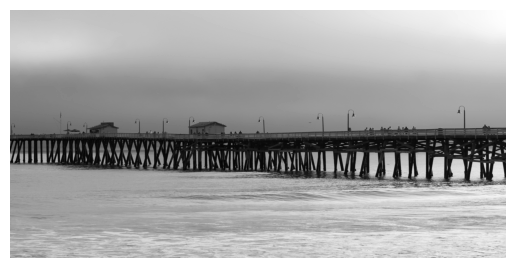

In [2]:
M = imread('PICS/bridge_big.png')
print(f"M with dimensions {M.shape}")
M = torch.from_numpy(M)
plt.imshow(M, cmap='gray')
plt.axis('off')
plt.show()

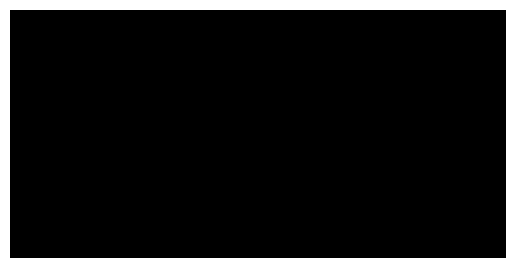

In [3]:
M_incomplete = remove_pixels_uniformly(M, missing_part=0.9)
missing_mask = torch.isnan(M_incomplete)

current_cmap = matplotlib.colormaps["gray"]
current_cmap.set_bad(color="black")
plt.axis("off")
plt.imshow(M_incomplete, cmap=current_cmap)

In [4]:
%%time
n_selected_cols = int(0.3 * M.shape[1])
solver = CSMC(M_incomplete, solver=SoftImpute, col_number=n_selected_cols, transform=dls, col_select=uniform, fill_method="zero", lambda_=100)
M_filled = solver.fit_transform(M_incomplete)

CPU times: user 48min 53s, sys: 1min 2s, total: 49min 55s
Wall time: 6min 30s


Relative approximation error 0.034453652799129486


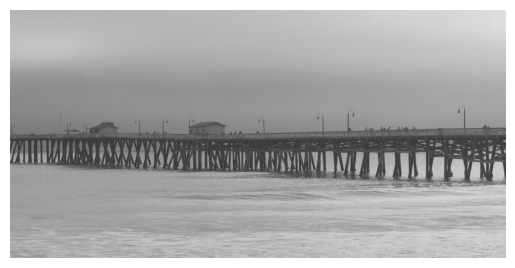

In [5]:
print(f"Relative approximation error {approx_err(M_filled, M)}")
plt.axis("off")
plt.imshow(M_filled, cmap="gray")
plt.show()

In [6]:
%%time
solver = SoftImpute(M_incomplete, lambda_=100)
missing_mask = torch.isnan(M_incomplete)
M_filled = solver.fit_transform(M_incomplete, missing_mask)

CPU times: user 1h 43min 47s, sys: 17min 28s, total: 2h 1min 15s
Wall time: 16min 12s


Relative approximation error 0.0474034808576107


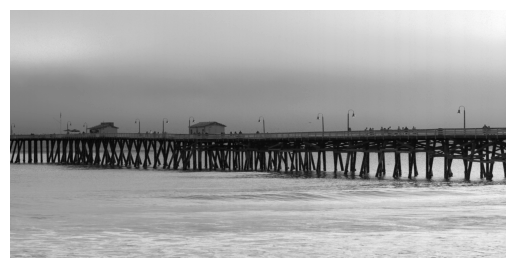

In [7]:
print(f"Relative approximation error {approx_err(M_filled, M)}")
plt.axis("off")
plt.imshow(M_filled, cmap="gray")
plt.show()